(sec-loops)=
# Schleifen

Viele Aufgaben, die wir über unser Leben hinweg verrichten sind langweilig, da wir immer und immer wieder die gleichen Basisschritte wiederholen müssen. 

Nehmen Sie nur das Nachschlagen einer Telefonnummer im Telefonbuch (falls Sie so etwas überhaupt noch kennen). Wir gehen dabei Seite für Seite durch und suchen nach einem bestimmten Namen - langweilig ...

Auch ganz alltägliche Dinge wie der Abwasch, Zähneputzen, Kochen, ja nahezu jede Aktion beinhaltet die eine oder andere Art der Wiederholung.

Wie sich gezeigt hat, können wir interessanterweise durch diese langweiligen Wiederholungen ganz erstaunliche Dinge vollbringen. 

```{admonition} Wiederholung
:class: remark

Wiederholung ist die Grundlage aller Berechnung.
```

## Motivation

Lassen Sie uns einmal auf unseren Roboter blicken.
Dieser bewegt sich auf einem Gitter.
Jeder Gitterpunkt ist entweder begehbar oder durch ein Hindernis belegt.
Der Roboter kann nur nach vorne laufen und sich nach links um 90 Grad drehen.
Eine genauere Beschreibung des Roboters und seiner Welt finden Sie in der Übung [Roboterwelt](sec-robo-world).

Die folgende Welt enthält unseren Roboter (türkis), das Ziel (gelb), begehbare Zellen (lila) und unbegehbare Hindernisse (blau).

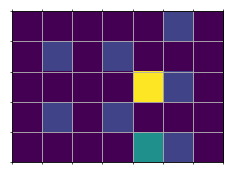

In [1]:
import roboworld as rw

world = rw.complex_maze(nrows=5, ncols=7)
world.show()

Wir sollen nun einen Algorithmus entwerfen, welcher den Roboter zum Ziel führt (sofern dies möglich ist).
Diese Aufgabe scheint überwältigend schwierig!

Wir verwenden das ``random``-Modul um einen *fairen Münzwurf* zu simulieren.
Zudem verwenden wir lediglich folgende Methoden des Roboters:
+ ``turn_left()``
+ ``is_wall_in_front()``
+ ``move()``
+ ``is_at_goal()``

In wie vielen Zeilen Code können wir dieses Problem lösen?
Durch das Potenzial der **Wiederholung** brauchen wir ca. 10 Zeilen Code!

Zuerst definieren wir eine Funktion ``random_move(robo)`` welche den Roboter um einen zufälligen Nachbargitterpunkt bewegt (falls dies möglich ist).

In [2]:
import random as rnd

def random_move(robo):
    turns = rnd.choice([0,1,2,3])
    for _ in range(turns):
        robo.turn_left()
    if not robo.is_wall_in_front():
        robo.move()

Dann nutzten wir die Wiederholung und bewegen den Roboter immer weiter auf zufällige Nachbargitterpunkte bis er am Ziel angekommen ist:

In [3]:
robo = world.get_robo()
robo.disable_print()
while not robo.is_at_goal():
    random_move(robo)

Lassen Sie uns die sog. *Zufallsfahrt* des Roboters ansehen:

In [4]:
rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


Ist dieser Algorithmus besonders klever?
Nein!
Der Algorithmus ist sehr einfach und benötigt unter Umständen sehr viel Rechenzeit.
Dennoch zeigt dieses Beispiel, dass die Wiederholung von einfachen Befehlen zu komplexen Lösungen führen können!

```{admonition} Wiederholung und Codekomplexität
:class: remark
*Wiederholung* trennt den Aufwand zum Lösen einer Aufgabe von der Komplexität des Codes.
Eine Berechnung kann enorm aufwendig sein und dennoch benötigen wir wenig Denkarbeit (wenig Code) um einen Algorithmus für die Lösung zu entwerfen!
```

(sec-for)=
## Die ``for``-Schleife

Die ``for``-Schleife verwenden wir immer dann, wenn wir (zur Laufzeit) vor dem Eintritt in die Wiederholung wissen, wie viele Wiederholungen wir **maximal** benötigen.
Dabei wollen wir entweder

1. für eine bestimmte Anzahl $n \in \mathbb{N}$, oder
2. für jedes Element einer *Datenstruktur* (Liste, Tupel, usw.)

einen Befehlsblock ausführen.

Im zweiten Fall spricht man auch von der sog. *Foreach-Schleife*.
Durch den Zahlenbereich ``range()`` reduziert ``Python`` den ersten Fall auf den zweiten.

### Die klassische ``for``-Schleife (Fall 1)

```python
n = ...
for i in range(n):
    # Codeblock
```

Der Name der *Zählervariable* (hier ``i``) kann frei gewählt werden, allerdings verwendet man für Fall 1 gewöhnlich: ``i``, ``j`` oder ``k``.

In [5]:
for i in range(10):
    print(i**2)

0
1
4
9
16
25
36
49
64
81


Will man andeutet, dass die *Zählervariable* nicht benötigt wird, so verwendet man den Unterstrich ``_`` als ihren Namen.

In [6]:
for _ in range(10):
    print('42 ist die Antwort!')

42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!
42 ist die Antwort!


### Die Foreach-Schleife (Fall 2)

```python
sequenz = ... # some Sequenz of Elements
for element in sequenz:
    # Codeblock
```

Der Name mit dem wir die Elemente der Sequenz ansprechen (hier ``element``) kann frei gewählt werden und sollte beschreiben über welche Elemente wir *iterieren*.

In [7]:
names = ['Sarah', 'Sebastian', 'Babar', 'Simon', 'Martin']

for name in names:
    print(name)

Sarah
Sebastian
Babar
Simon
Martin


``range()`` ist, genau wie eine Liste und ein Tupel, auch eine *Sequenz*.
Eine ``for``-Schleife läuft über die Einträge einer *Sequenz* oder anderer *iterierbarer* Strukturen.

Es kann durchaus sein, dass wir die ``for``-Schleife auch dann verwenden, wenn nicht genau klar ist wie viele Wiederholungen wir benötigen.
Ist uns bekannt wie viele Wiederholungen wir **maximal** benötigen ist dies kein Problem.

Nehmen wir den Test ob eine Zahl $n$ eine Primzahl ist.
Ein einfacher Algorithmus für den Test, testet für jede Zahl $m \in \{2, 3, \ldots, n-1\}$ ob $m$ die Zahl $n$ teilt.
Wenn dies der Fall ist, ist $n$ keine Primzahl und wir können die Wiederholung stoppen.
Wir wissen demnach, dass wir maximal $n-m-3$ Wiederholungen benötigen.
Es könnten jedoch auch weniger sein:

In [8]:
def is_prime(n):
    prime = True
    for i in range(2, n):
        if n % i == 0:
            prime = False
            break
    return prime

print(is_prime(2))
print(is_prime(13))
print(is_prime(25))
print(is_prime(83))

True
True
False
True


Um die ``for``-Schleife frühzeitig zu beenden verwenden wir ``break``.
Mit ``break`` springen wir aus der **innersten** Schleife heraus.
Wir könnten stattdessen auch ``return`` verwenden, um aus der gesamten Funktion herauszuspringen:

In [9]:
def is_prime(n):
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

print(is_prime(2))
print(is_prime(13))
print(is_prime(25))
print(is_prime(83))

True
True
False
True


Eine weitere Steuermöglichkeit bietet ``continue``.
Mit ``continue`` springen wir nicht aus der Schleife heraus sondern springen zurück zum Schleifenkopf.
Der Code nach ``continue`` wird übersprungen:

In [10]:
def double_even_numbers(numbers):
    result = []
    for number in numbers:
        if number % 2 == 1:
            continue
            
        print(number)
        result.append(number*2)
    return result
numbers = list(range(10))
double_even_numbers(numbers)

0
2
4
6
8


[0, 4, 8, 12, 16]

Allerdings braucht man ``continue`` so gut wie nie und wenn es verwendet wird handelt es sich oftmals um schlecht leserlichen Code.

In [11]:
def double_even_numbers(numbers):
    result = []
    for number in numbers:
        if number % 2 == 0:    
            print(number)
            result.append(number*2)
    return result
numbers = list(range(10))
double_even_numbers(numbers)

0
2
4
6
8


[0, 4, 8, 12, 16]

```{admonition} Kontrollmechanismen der for-Schleife
:class: remark
Gehen Sie sparsam mit ``break`` und ``continue`` um, oftmals brauchen Sie es nicht!
```

### Die ``while``-Schleife

Die ``while``-Schleife verwenden wir immer dann, wenn wir (zur Laufzeit) **nicht** wissen wie viele Wiederholungen wir maximal benötigen.
Die Wiederholung endet sobald eine bestimmte Bedingung, d.h. ein *logischer Ausdruck* ``P`` zu ``False`` ausgewertet wird.

```python
while P:
    # Codeblock1
else: # (optional)
    # Codeblock2
```

``Codeblock2`` wird einmal ausgeführt sobald ``P`` zu ``False`` ausgewertet wird und die ``while``-Schleife verlassen wird, d.h. als letzter Schritt.

```{admonition} Endlosschleifen
:class: attention
Wird ``P`` niemals ``False``, so endet die Wiederholung niemals und wir haben eine sog. *Endlosschleife*!
```

In [12]:
i = 0
while i < 10:
    i += 1
    print(i)
else:
    print('end of the while-loop')

1
2
3
4
5
6
7
8
9
10
end of the while-loop


```{admonition} Mächtigkeit der While-Schleife
:class: theorem
Jede ``for``-Schleife lässt sich in eine ``while``-Schleife transformieren!
```

In [13]:
names = ['Sarah', 'Sebastian', 'Babar', 'Simon', 'Martin']

for name in names:
    print(name)

print()

i = 0
while i < len(names):
    print(names[i])
    i += 1

Sarah
Sebastian
Babar
Simon
Martin

Sarah
Sebastian
Babar
Simon
Martin


``while``-Schleifen sind mächtiger aber auch gefährlicher bzw. oftmals schwerer zu lesen und zu verstehen als ``for``-Schleifen.

```{admonition} Verwendungskriterium
:class: remark
Verwenden Sie die ``while``-Schleife nur wenn die ``for``-Schleife ungeeignet ist.
```

``break`` und ``continue`` funktionieren für die ``while``-Schleife genauso wie für die ``for``-Schleife.

```{admonition} Verwendungskriterium While-Schleife
:class: remark
Gehen Sie sparsam mit ``break`` und ``continue`` um, oftmals brauchen Sie es nicht!
```

Folgender Code zeigt eine unnötige Verwendung von ``continue``.

In [14]:
# bad code!!!
i = 0
while i < 10:
    i += 1
    if i % 2 == 0:
        continue
    print(i)

1
3
5
7
9


Stattdessen können wir die ``if``-Bedingung anpassen.

In [15]:
# better!
i = 0
while i < 10:
    i += 1
    if i % 2 == 1:
        print(i)

1
3
5
7
9


Oder aber Sie erhöhen die Zählervariable um zwei anstatt um eins.

In [16]:
# even better!
i = 1
while i < 10:      
    print(i)
    i += 2

1
3
5
7
9


Am einfachsten zu lesen bleibt jedoch die ``for``-Schleife.

In [17]:
# even better!
for i in range(1,10,2):
  print(i)

1
3
5
7
9


```{admonition} Verhindern von Endlosschleifen
:class: remark
Prüfen Sie immer ob Ihre Bedingung ``P`` durch den Schleifenrumpf garantiert irgendwann ``False`` ergibt!
```

## Beispiel (ggT)

Lassen Sie uns [Euklid's Algorithmus](sec-euclid-alg) ``gcd(m,n)`` zum finden des Größter gemeinsamer Teiler (ggT) zweier ganzer Zahlen von $m$ und $n$ erneut implementieren.

Euklid's Algorithmus geht wie folgt vor:

1. Berechne den Restwert der Division $m / n$ (Modulodivision). Sei dieser gleich $r$.
2. Setze $m \leftarrow n$, $n \leftarrow r$ und gehe zurück zu Schritt 1.
3. Falls $r = 0$ (und somit $n = 0$), so ist der Algorithmus beendet. Das Ergebnis (ggT) ist $m$. Ansonsten fahre fort.

In [18]:
def gcd(m, n):
    while n != 0:
        r = m % n
        m = n
        n = r
    return m
gcd(36, 24)

12

Durch das packing bzw. unpacking (siehe [Tupel](sec-tuple)) können wir den Code noch verkürzen:

In [19]:
def gcd(m, n):
    while n != 0:
        m, n = n, m % n
    return m
gcd(36, 24)

12